<a href="https://colab.research.google.com/github/jumafernandez/SIyBD-UNTreF/blob/main/codigo/notebooks/xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGboost

En esta notebook, compartimos el entrenamiento modelo a través de la técnica de ensamble *xgboost*.


En primer lugar, se cargan las librerías necesarias y el dataset desde el módulo `sklearn.datasets`:

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

In [ ]:
# Cargar el dataset directamente desde sklearn
from sklearn.datasets import load_wine
wine_data = load_wine()

# Crear un DataFrame con los datos
wine = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
wine['clase'] = wine_data.target

Hacemos algunas exploraciones básicas del dataset:

In [ ]:
# Mostrar las primeras filas
print(wine.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  clase  
0           

Verificamos tipos de datos y valores faltantes:

In [ ]:
# Tipo de datos de cada columna
print(wine.info())

# Resumen de estadísticas descriptivas para cada columna
print(wine.describe())

# Comprobar si hay valores nulos
print(wine.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  clase

Verificamos la distribución de la variable objetivo:

clase
1    71
0    59
2    48
Name: count, dtype: int64


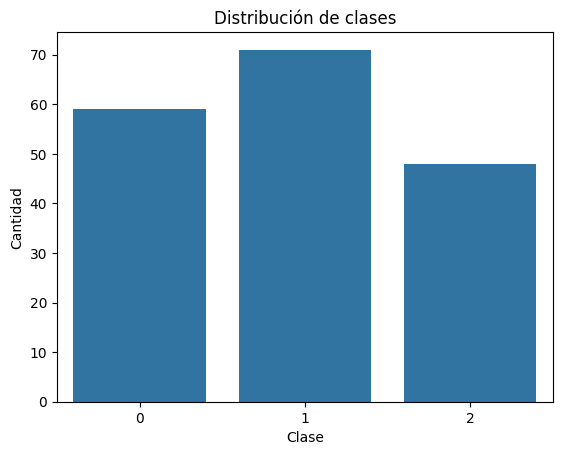

In [ ]:
# Contar cuántas instancias hay de cada clase
print(wine['clase'].value_counts())

# Graficar la distribución de la variable de clase
sns.countplot(x='clase', data=wine)
plt.title('Distribución de clases')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.show()

Visualizamos las distribuciones de las variables numéricas:

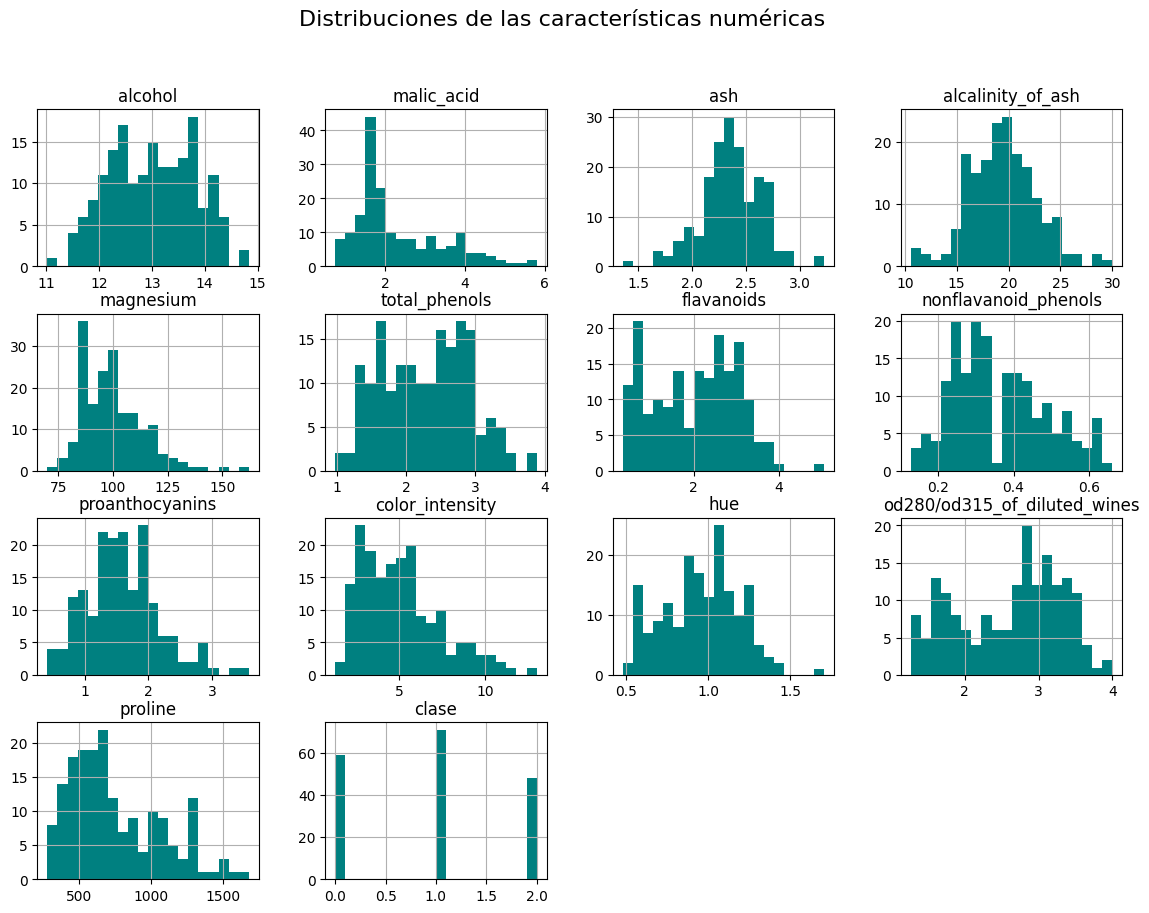

In [ ]:
# Histograma para cada característica numérica
wine.hist(bins=20, figsize=(14, 10), color='teal')
plt.suptitle('Distribuciones de las características numéricas', fontsize=16)
plt.show()

Verificamos si existe relación entre las variables y la clase:

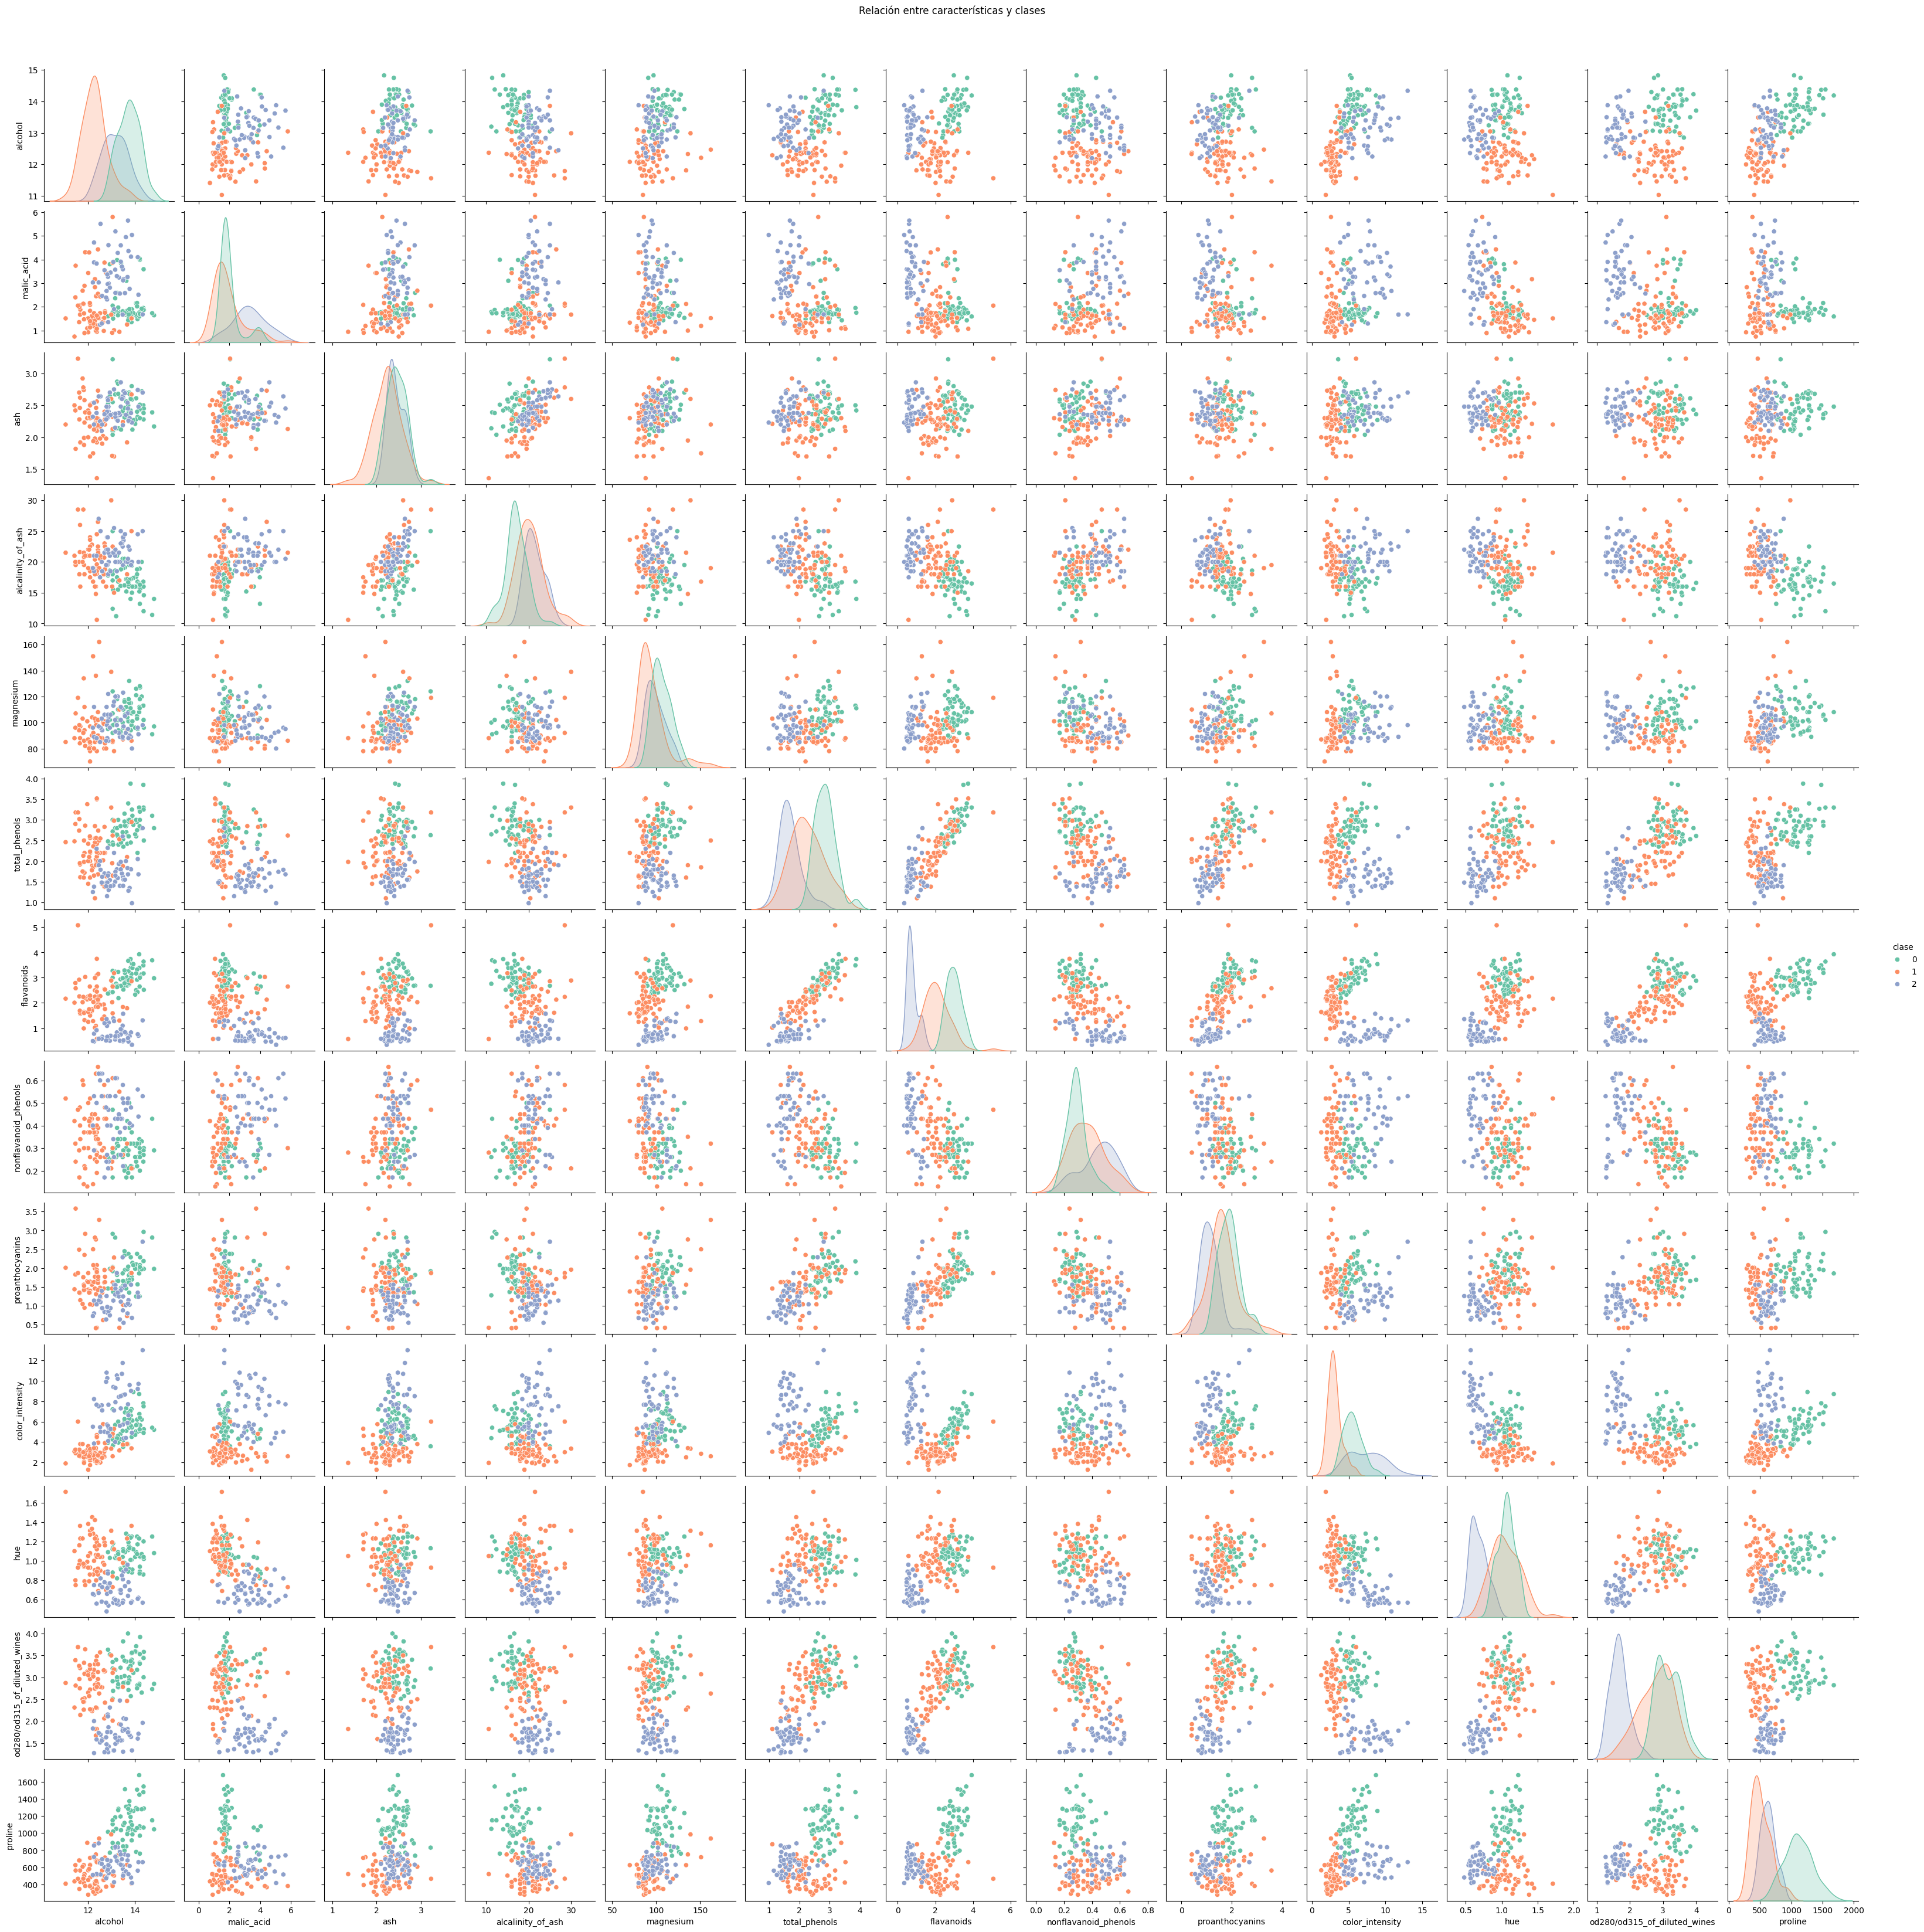

In [ ]:
# Gráfico de pares para observar la relación entre algunas variables
sns.pairplot(wine, hue='clase', diag_kind='kde', palette='Set2')
plt.suptitle('Relación entre características y clases', y=1.02)
plt.show()

Luego, se divide el dataset en la matriz de características y el vector de clases:

In [ ]:
X = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)  # Características
y = pd.Series(wine_data.target)  # Etiquetas

Se separa en train y test el conjunto de datos:

In [ ]:
# Dividir en conjuntos de entrenamiento y prueba (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Se convierten los datos al tipo `DMatrix`.

`DMatrix` almacena los datos en formato comprimido, lo que reduce el uso de memoria. Esto es especialmente útil cuando se trabaja con grandes conjuntos de datos o con datos dispersos (sparse data).


In [ ]:
# Convertir los datos a DMatrix y usar los nombres originales de las características
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=X.columns.tolist())
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=X.columns.tolist())

Se inicializa y entrena el modelo con los datos de entrenamiento:

In [ ]:
# Configurar los parámetros de XGBoost
params = {
    'objective': 'multi:softmax',  # Clasificación multiclase
    'num_class': len(wine_data.target_names),  # Número de clases
    'eval_metric': 'mlogloss'  # Función de pérdida
}

# Entrenar el modelo con 100 rondas de boosting
modelo_xgboost = xgb.train(params, dtrain, num_boost_round=100)

Se valida la performance del árbol generado haciendo una predicción de las clases de los ejemplos de entrenamiento (eliminando la clase) y se grafica la martriz de confusión:

In [ ]:
# Realizar predicciones en el conjunto de prueba
predicciones_xgboost = modelo_xgboost.predict(dtest)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, predicciones_xgboost)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

Precisión del modelo: 98.15%


In [ ]:
# Reporte de clasificación
print("Reporte de clasificación:\n", classification_report(y_test, predicciones_xgboost))

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       1.00      1.00      1.00        21
           2       0.94      1.00      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



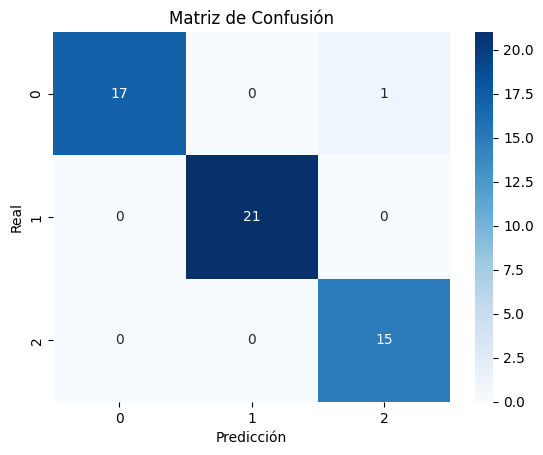

In [ ]:
# Crear la matriz de confusión
cm = confusion_matrix(y_test, predicciones_xgboost)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

Luego, se verifica la importancia de cada variable en el modelo obtenido:

                 Características  Importancia
11                       proline         45.0
8                color_intensity         44.0
0                        alcohol         28.0
6                     flavanoids         26.0
5                  total_phenols         14.0
9                            hue         12.0
1                     malic_acid         10.0
4                      magnesium          9.0
3              alcalinity_of_ash          7.0
10  od280/od315_of_diluted_wines          4.0
2                            ash          3.0
7           nonflavanoid_phenols          2.0


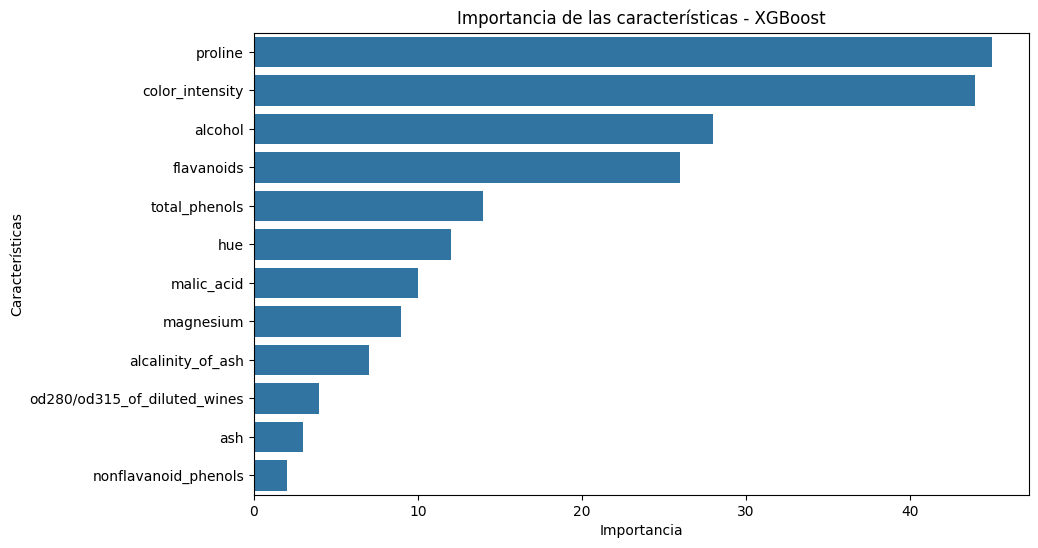

In [ ]:
# Obtener la importancia de las características
importancia = modelo_xgboost.get_score(importance_type="weight")

# Convertir la importancia de características en un DataFrame para visualizar
importancia_df = pd.DataFrame({
    'Características': list(importancia.keys()),
    'Importancia': list(importancia.values())
})

# Ordenar por importancia descendente
importancia_df = importancia_df.sort_values(by="Importancia", ascending=False)
print(importancia_df)

# Graficar la importancia de las características con los nombres originales
plt.figure(figsize=(10, 6))
sns.barplot(x="Importancia", y="Características", data=importancia_df)
plt.title("Importancia de las características - XGBoost")
plt.show()

Por último, se realiza una visualización de los primeros árboles del ensamble:

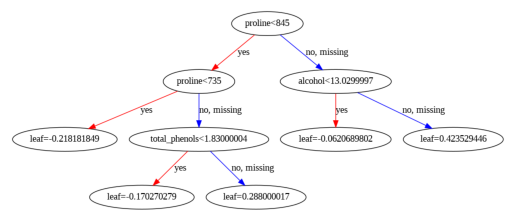

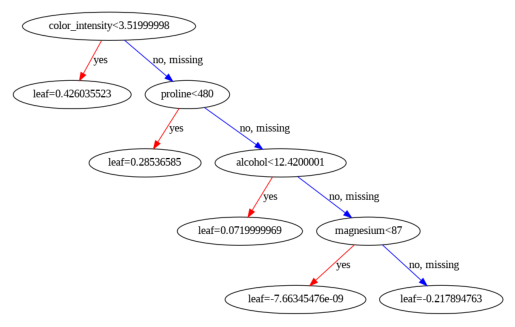

In [ ]:
# Visualizar los primeros árboles
xgb.plot_tree(modelo_xgboost, num_trees=0)
plt.show()

xgb.plot_tree(modelo_xgboost, num_trees=1)
plt.show()